# Mini Project : California Housing

# Part 1

In [1]:
# Required Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = fetch_california_housing()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['Target'] = data['target']

In [3]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [7]:
# Preview the data
data_preview = df.head()
data_preview

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
# Metadata
metadata = df.info()
metadata

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
# Preprocess the Data
# Check for missing data
missing_data = df.isnull().sum()
missing_data

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [10]:
# Normalize continuous variables
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
df_scaled['Target'] = df['Target']
df_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,4.526
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,3.585
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,3.521
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,3.413
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,3.422


In [11]:
# Categorical Variables
# Categorizing 'HouseAge'
df_scaled['HouseAge_cat'] = pd.cut(df_scaled['HouseAge'], bins=[0, 0.33, 0.66, 1], labels=['New', 'Old', 'Very Old'])
df_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target,HouseAge_cat
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,4.526,Very Old
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,3.585,Old
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,3.521,Very Old
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,3.413,Very Old
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,3.422,Very Old


In [12]:
# One-hot encoding
df_encoded = pd.get_dummies(df_scaled, columns=['HouseAge_cat'])
df_encoded.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target,HouseAge_cat_New,HouseAge_cat_Old,HouseAge_cat_Very Old
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,4.526,False,False,True
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,3.585,False,True,False
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,3.521,False,False,True
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,3.413,False,False,True
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,3.422,False,False,True


In [13]:
# Correlations
correlation_matrix = df_encoded.corr()
correlation_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target,HouseAge_cat_New,HouseAge_cat_Old,HouseAge_cat_Very Old
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075,0.107291,-0.007789,-0.086816
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623,-0.715701,-0.158593,0.798256
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948,0.138608,-0.004547,-0.118445
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701,0.072194,0.002163,-0.066470
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650,0.217608,0.039511,-0.233008
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737,-0.008477,-0.008236,0.016033
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160,0.027563,-0.019500,-0.004251
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967,0.047986,0.027140,-0.070609
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000,-0.064210,-0.015740,0.073325
HouseAge_cat_New,0.107291,-0.715701,0.138608,0.072194,0.217608,-0.008477,0.027563,0.047986,-0.064210,1.000000,-0.467575,-0.398921


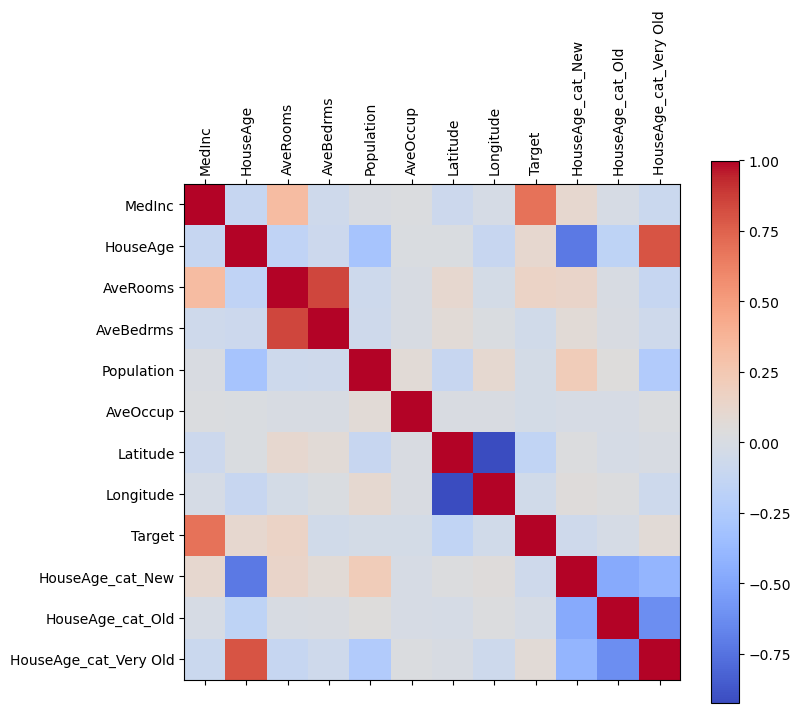

In [14]:
plt.figure(figsize=(8, 7))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
plt.colorbar()
plt.xticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=90)
plt.yticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns)
plt.show()

In [15]:
# Average income per room by dividing 'MedInc' by 'AveRooms'.
df_encoded['IncomePerRoom'] = df_encoded['MedInc'] / df_encoded['AveRooms']
df_encoded.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target,HouseAge_cat_New,HouseAge_cat_Old,HouseAge_cat_Very Old,IncomePerRoom
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,4.526,False,False,True,12.402663
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,3.585,False,True,False,14.075652
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,3.521,False,False,True,8.833573
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,3.413,False,False,True,10.064943
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,3.422,False,False,True,5.988918


# PART2

Part II
Instruction : Analyse the relationship between Property Age and Price

More Detailed Hints:

Boolean Indexing for Age Groups:
New: Houses aged 10 years or less.
Old: Houses aged between 11 and 30 years.
Very Old: Houses aged more than 30 years.

Plotting Histograms:

Use matplotlib to plot a histogram that compares property age with its median value.

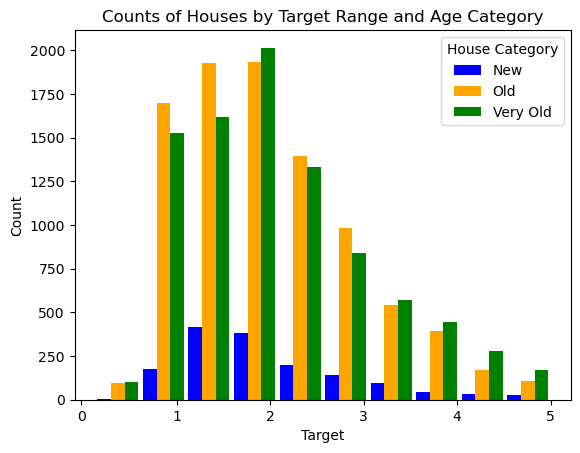

In [16]:
# Initialize lists to store the counts for each category in each 'Target' range
old_counts = []
new_counts = []
very_old_counts = []

# Define the range of 'Target' values
target_ranges = [(i * 0.5, (i + 1) * 0.5) for i in range(10)]

# Divide the 'Target' values into the defined ranges and count the houses in each category for each range
for lower_bound, upper_bound in target_ranges:
    
    # Filter 'Target' values within the specified range
    filtered_df = df[(df['Target'] >= lower_bound) & (df['Target'] < upper_bound)]
    
    # Categorize houses and append the counts to the respective lists
    old_counts.append(len(filtered_df[(filtered_df['HouseAge'] >= 11) & (filtered_df['HouseAge'] <= 30)]))
    new_counts.append(len(filtered_df[filtered_df['HouseAge'] <= 10]))
    very_old_counts.append(len(filtered_df[filtered_df['HouseAge'] > 30]))

# Create a figure and axis
fig, ax = plt.subplots()

# Define the positions for each set of bars
x = np.arange(len(target_ranges))  # Number of 'Target' ranges

# Width of each sub-bar, adjust as needed for spacing
bar_width = 0.3

# Plot the bars for "Old," "New," and "Very Old" houses in each 'Target' range
ax.bar(x - bar_width, new_counts, bar_width, label='New', color='blue')
ax.bar(x, old_counts, bar_width, label='Old', color='orange')
ax.bar(x + bar_width, very_old_counts, bar_width, label='Very Old', color='green')

# Customize the chart
ax.set_xlabel('Target')
ax.set_ylabel('Count')
ax.set_title('Counts of Houses by Target Range and Age Category')
# This will space the labels evenly across the 10 bar groups
ax.set_xticks([-0.8, 1.3, 3.35, 5.4, 7.45, 9.5])

# Then we label these positions with '1', '2', '3', '4', '5'
ax.set_xticklabels(['0','1', '2', '3', '4', '5'])
ax.legend(title='House Category')

# Show the chart
plt.show()

# Part III


Instruction : Analyse the Neighborhood Crime Rate Impact on Prices

More Detailed Hints:

Creating Binned Income:
Divide median income into bins.
Hint: Use pd.cut().


Grouping by Binned Income:

Group by the binned income and find the average Target.


Plotting Line Plot:

Visualize the grouped data with a line plot. Label and title your chart accordingly.

In [17]:
# Step 1: Creating Binned Income
# Define your bin edges and labels
bin_edges = [0, 2, 4, 6, 8, 100]  # Adjust based on the range of 'MidInc'
bin_labels = ['0-2', '2-4', '4-6', '6-8', '8+']  # Labels for the bins

# Create a new column for binned income
df['IncomeBin'] = pd.cut(df['MedInc'], bins=bin_edges, labels=bin_labels)


In [18]:
# Step 2: Grouping by Binned Income
grouped_data = df.groupby('IncomeBin', observed=True)['Target'].mean()

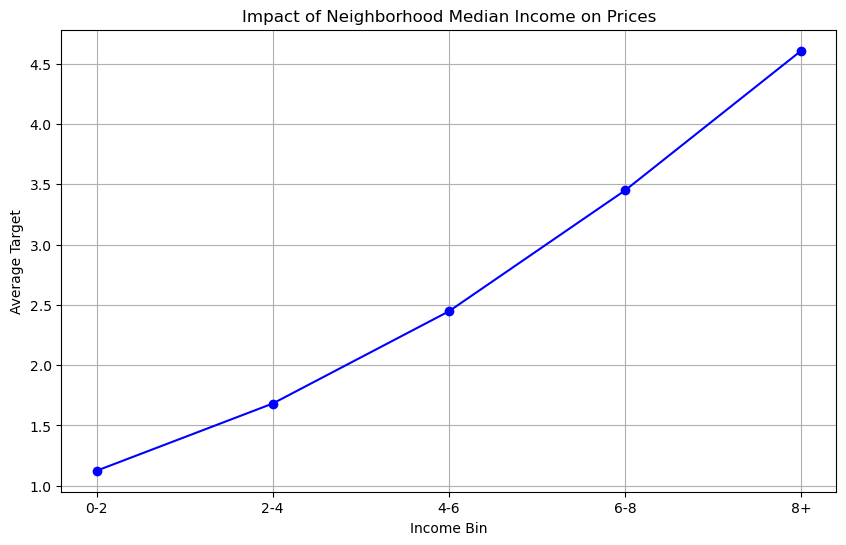

In [19]:

# Step 3: Plotting Line Plot
plt.figure(figsize=(10, 6))
plt.plot(grouped_data, marker='o', linestyle='-', color='b')
plt.title('Impact of Neighborhood Median Income on Prices')
plt.xlabel('Income Bin')
plt.ylabel('Average Target')
plt.grid(True)
plt.show()